<a href="https://colab.research.google.com/github/amide-inc/deeplearning/blob/main/recognize-sentimante-text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#run this to ensure tensorflow 2.x is used
try:
  # %tensorflow_version only exists in colab
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
vacob_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type ='post'
oov_tok = '<OOV>'
training_size = 20000

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-06-14 08:33:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-06-14 08:33:15 (102 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [6]:
with open('/tmp/sarcasm.json', 'r') as f:
  datastore = json.load(f)


In [9]:
sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [11]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [15]:
tokenizer = Tokenizer(num_words=vacob_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [16]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
traing_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded =  np.array(testing_padded)
testing_labels = np.array(testing_labels)


##create RNN model

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vacob_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')             
])

In [29]:
#add optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [31]:
num_epochs = 30
history = model.fit(traing_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.6617 - accuracy: 0.5905 - val_loss: 0.5649 - val_accuracy: 0.7076
Epoch 2/30
625/625 - 2s - loss: 0.4138 - accuracy: 0.8342 - val_loss: 0.3753 - val_accuracy: 0.8408
Epoch 3/30
625/625 - 2s - loss: 0.2983 - accuracy: 0.8812 - val_loss: 0.3562 - val_accuracy: 0.8474
Epoch 4/30
625/625 - 2s - loss: 0.2479 - accuracy: 0.9028 - val_loss: 0.3475 - val_accuracy: 0.8547
Epoch 5/30
625/625 - 2s - loss: 0.2120 - accuracy: 0.9168 - val_loss: 0.3485 - val_accuracy: 0.8496
Epoch 6/30
625/625 - 2s - loss: 0.1870 - accuracy: 0.9286 - val_loss: 0.3571 - val_accuracy: 0.8535
Epoch 7/30
625/625 - 2s - loss: 0.1636 - accuracy: 0.9392 - val_loss: 0.3723 - val_accuracy: 0.8529
Epoch 8/30
625/625 - 2s - loss: 0.1467 - accuracy: 0.9470 - val_loss: 0.3894 - val_accuracy: 0.8514
Epoch 9/30
625/625 - 2s - loss: 0.1317 - accuracy: 0.9528 - val_loss: 0.4100 - val_accuracy: 0.8512
Epoch 10/30
625/625 - 2s - loss: 0.1182 - accuracy: 0.9577 - val_loss: 0.4466 - val_accuracy: 0.8442

##ploting

In [33]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])

  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

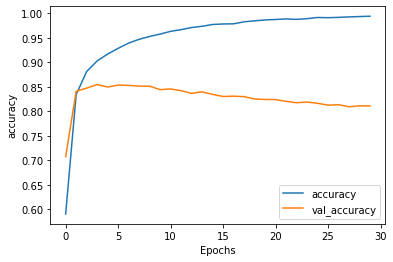

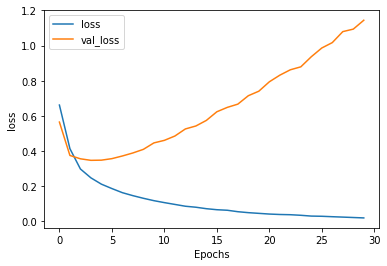

In [34]:
plot_graph(history, 'accuracy')
plot_graph(history, "loss")

In [35]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [37]:
def decode_sentences(text):
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentences(training_padded[2]))
print(training_sentences[2])
print(labels[2])

mom starting to fear son's web series closest thing she will have to grandchild ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [39]:
e =  model.layers[0]
weights = e.get_weights()[0]
print(weights[0])

[ 0.03876247 -0.01213043 -0.04581573 -0.00042408  0.0028717  -0.00620314
  0.12488276  0.12198076 -0.01339776 -0.00784733 -0.03061398  0.00164527
  0.03853206 -0.04911447  0.02305983  0.03217307]


In [41]:
import io
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vacob_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


In [42]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
def final_word(num):
  if num >= 0.7:
    return "Very funny, Now please shutup"
  elif num < 0.3:
    return "Yeah You are saying right"
  return "Ok"

In [63]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night", "You chest loooks like a boobs"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# print(model.predict(padded))
print(final_word(model.predict(padded)[2]))


Very funny, Now please shutup
